The models that we built , needs proper evaluation to understand how they will perform on real world data in production. That's why we have some set evaluation techniques in place for specific kinds of machine learning problems. We will discuss all of them one by one here.

##### Regression Problems

Regression problems are those kind of problems where our target variable or ourput is a continuous variable. Like predicting weather temparature , salary etc etc. And there are some set model evaluation techniques present for such problems. Let's look into it.

    -   Mean Squared Error (MSE)
        
    In regression problems let's understand the error part first. We get an actual value(target variable) present in our test data and our regression model will also predict a value for the target variable. Now this predicted value and the actual value will continue to have some differences. This differences are called errors. In certain cases this differences can be positive , in some cases it can be negative as well. So to bring all the values in the positive section , we square up the errors. And at the end we go ahead find out the mean of all the errors. That's called mean Squared Error or MSE. Below is given the formual of MSE


![Alt text](Mean%20Squared%20Error%20Formual.png)

Let's understand mean squared error with code example

In [1]:
#importing the neccesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import mean_squared_error as mse

In [2]:
# lets import our dataset , we will work with boston data itself
df = pd.read_csv('BostonHousing.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# let's check few details of the data
print(f'the missing value level present in the data is as below {df.isnull().sum()}')

the missing value level present in the data is as below crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [4]:
# let's divide our data in x and y for feature and target variable identification
x = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [5]:
x

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [6]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [7]:
# Now we need to scale our features so that it remains in the same scale with standaradscaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [8]:
x

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [9]:
# now let's go ahead and do our train test split
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2,random_state=42)

In [10]:
# now let's train our model
lr = lr()

In [11]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [12]:
lr.score(xtest,ytest)

0.668759493535632

Now that our linear regression model is built , let's build a prediction variable as ypred

In [13]:
ypred = lr.predict(xtest)

In [14]:
ypred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [15]:
ytest

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
412    17.9
436     9.6
411    17.2
86     22.5
75     21.4
Name: medv, Length: 102, dtype: float64

In [16]:
print(len(xtest))

102


In [17]:
print(len(ytest))

102


In [18]:
print(len(ypred))

102


<AxesSubplot:xlabel='medv'>

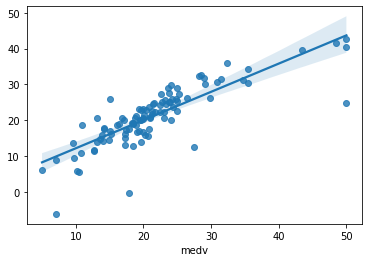

In [19]:
# lets visualiza our model prediction and actual values
import seaborn as sns
sns.regplot(x = ytest , y = ypred )

In [20]:
# let's create a list of errors , which is simply substracting the actual values from the predicted values
changes = list(ypred-ytest)

In [21]:
changes

[5.396723619824883,
 3.625565335672313,
 1.216944045388285,
 2.2319791503995674,
 2.669879915248149,
 3.2544292914679716,
 -0.13746181779418976,
 0.3411899997547092,
 3.413207026913337,
 3.8324559727508465,
 3.408505116349641,
 -0.2611635466075555,
 -13.088421842193625,
 0.5583466809972926,
 0.7392257593035794,
 -3.6068026717863546,
 1.8477331297073185,
 -4.405272821115485,
 -9.499660339492422,
 3.5128907427671674,
 2.0490947868518354,
 0.9662544095122598,
 -1.3582072271767238,
 1.7607761605923677,
 3.660584986887809,
 2.036097647919295,
 2.4814810552120647,
 -0.3229555113683009,
 0.7362605243684825,
 0.8963183464667104,
 -0.6661654488658755,
 1.4197908067564846,
 10.939095624449543,
 -3.0983756592133993,
 -2.3308828901820533,
 -2.448745890731942,
 -3.4665984706249944,
 0.6324672853666868,
 -0.6342098892753363,
 1.2322924971596656,
 -5.757950450869547,
 4.055763011339312,
 -7.327488388980569,
 -0.07254953572099865,
 4.676186138004901,
 1.893109908316207,
 0.9700910916451431,
 1.7034186

In [22]:
# creating a dataframe storing actual , predicted and changed values 
ch_df = pd.DataFrame(data = {"actual_value":ytest,
                                 "predicted_value":ypred,
                                 "error":changes})
ch_df.head()

,actual_value,predicted_value,error
173,23.6,28.996724,5.396724
274,32.4,36.025565,3.625565
491,13.6,14.816944,1.216944
72,22.8,25.031979,2.231979
452,16.1,18.769880,2.669880


As we can see through visualization that there are errors present in the data and also we have checked through the list called 'changes' that how scattered our errors are , lets with the help of numpy first find out our mean squared error

In [23]:
# squaring all the errors
sq_error_list = []
for i in changes:
    sq_error_list.append(np.square(i))

In [24]:
sq_error_list

[29.124625828775784,
 13.144724003228692,
 1.480952809606004,
 4.981730927818375,
 7.128258761845464,
 10.591310013164723,
 0.018895751351283022,
 0.11641061593261846,
 11.649982208570583,
 14.687718783073636,
 11.61790712818168,
 0.0682063980766368,
 171.30678631921117,
 0.3117510161806924,
 0.5464547232179534,
 13.009025513205186,
 3.4141177186180025,
 19.406428628458784,
 90.24354656572528,
 12.340401370619261,
 4.198789445503369,
 0.933647583901886,
 1.8447268719550847,
 3.1003326877103996,
 13.39988244622842,
 4.1456936318624855,
 6.157748227376382,
 0.10430026232316074,
 0.5420795597433529,
 0.8033865782128179,
 0.44377640526267337,
 2.0158059349502295,
 119.66381308085113,
 9.599931725606067,
 5.433015047743442,
 5.996356437376573,
 12.01730495653955,
 0.4000148670591061,
 0.4022221836546343,
 1.5185447985560045,
 33.153993394668824,
 16.449213604148127,
 53.692086090645056,
 0.005263435133332459,
 21.866716797269195,
 3.5838651249649978,
 0.9410767260892654,
 2.9016349663612,
 

In [25]:
# now let's find the mean of this squared list
mse_numpy = np.mean(sq_error_list)
print(f'the mean squared error through numpy method is {mse_numpy}')

the mean squared error through numpy method is 24.29111947497352


In [26]:
# now let's find out the MSE through our sklearn method.
from sklearn.metrics import mean_squared_error
mse_sklearn = mean_squared_error(ytest,ypred)
print(f'the mean squared error through sklearn method is {mse_sklearn}')

the mean squared error through sklearn method is 24.29111947497352


Thus our theory is proved to be right as in both occasions we have got the same result of mean squared error. Near to 0 MSE indicates more accurate model.

    -   Mean Absolute Error (MAE)
        This simply means the mean of total sum of all errors that has been produced from our model, We will look into it with both with and without sklearn metrics below.

In [27]:
# finding the mean of all errors with numpy method
abs_error_lst = []
for i in changes:
    abs_error_lst.append(abs(i))
mae_numpy = np.mean(abs_error_lst) 
print(f'the mean absolute error with numpy method is {mae_numpy}')
#finding the mean of all errors with sklearn
from sklearn.metrics import mean_absolute_error
mae_sklearn = mean_absolute_error(ytest,ypred)
print(f'the mean absolute error with numpy method is {mae_sklearn}')

the mean absolute error with numpy method is 3.1890919658878505
the mean absolute error with numpy method is 3.1890919658878505


    -   Root Mean Squared Error(RMSE)
        This method potrays the root of our previously calculated mean squared error

In [28]:
# RMSE with numpy
rmse_numpy = np.sqrt(mse_numpy)
print(f'the root mean squared error with numpy method is {rmse_numpy}')
# RMSE with sklearn , sklearn do not have a direct library for this , we will use the mse formula with a parameter called squared set to false
rmse_sklearn = mean_squared_error(ytest,ypred,squared=False)
print(f'the root mean squared error with sklearn method is {rmse_sklearn}')

the root mean squared error with numpy method is 4.928602182665337
the root mean squared error with sklearn method is 4.928602182665337


    -   R2 Score (Co efficient of determination)
        This score can simply be found with 1 being substracted with the division of sum of squares or residuals and total sum of squares. Residuals are nothing but the errors present in our data. Like all methods before here also , we will look into the numpy method then sklearn method as well.

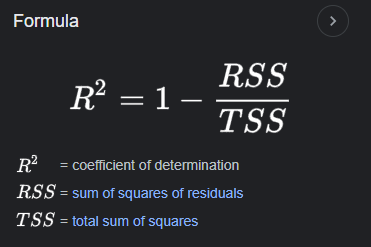

In [29]:
# R2 score with numpy
sum_sq_residuals = sum(np.square(changes))
sum_sq_total = sum(np.square(ytest,ypred))
r2score_numpy = 1 - (sum_sq_residuals/sum_sq_total)
print(f"the r2 score with numpy method here is {r2score_numpy}")

the r2 score with numpy method here is 0.9546026603697298


In [30]:
# R2 score with sklearn
from sklearn.metrics import r2_score
r2score_sklearn = r2_score(ytest,ypred)
print(f"the r2 score with sklearn method here is {r2score_sklearn}")

the r2 score with sklearn method here is -6696.531804262288
